# Prediction of movie success

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
full_dataset = pd.read_csv('IMDb movies.csv')
full_dataset.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,NaN,NaN,NaN,28.0,14.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438,NaN,NaN,NaN,NaN,12.0,5.0


Target variable - **avg_vote**. Average vote shows how people like film, how audiency accept or not accept it.

People like to watch films with higher ratings, such films also rank in the charts and are nominated for awards.

Viewer rating is a good measure of film success.

It is a regression task - we will predict the rating of the film.

As a metric we would take MSE - because we are interested in minimising deviations of predicted value from real one.

In [3]:
y = full_dataset["avg_vote"]
X = full_dataset.drop(["avg_vote"], axis=1)

In [4]:
from sklearn.metrics import mean_squared_error

## Data preprocessing

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,production_company,actors,description,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
48236,tt0768239,Storm,Storm,2009,2009-09-10,Drama,103,"Germany, Denmark, Netherlands, Sweden, Bosnia ...","English, German, Bosnian, Serbian",Hans-Christian Schmid,...,23/5 Filmproduktion GmbH,"Kerry Fox, Anamaria Marinca, Stephen Dillane, ...","Hannah Maynard, a prosecutor of Hague's Tribun...",1253,NaN,$ 16013,$ 2125950,58.0,11.0,54.0
2250,tt0027496,Dancing Pirate,Dancing Pirate,1936,1936-05-22,"Adventure, Comedy, Music",83,USA,English,Lloyd Corrigan,...,Pioneer Pictures Corporation,"Charles Collins, Frank Morgan, Steffi Duna, Lu...",The story of a Boston dance teacher who gets s...,186,NaN,NaN,NaN,NaN,22.0,4.0
34045,tt0182060,Dünyayi Kurtaran Adam,Dünyayi Kurtaran Adam,1982,1982,"Action, Adventure, Sci-Fi",91,Turkey,Turkish,Çetin Inanç,...,Anit Ticaret,"Cüneyt Arkin, Aytekin Akkaya, Füsun Uçar, Hüse...",Two space cadets crash-land on a desert planet...,7003,NaN,NaN,NaN,NaN,80.0,25.0
45122,tt0429614,Aus der Tiefe des Raumes,Aus der Tiefe des Raumes,2004,2004-12-16,Comedy,88,Germany,German,Gil Mehmert,...,Zweites Deutsches Fernsehen (ZDF),"Arndt Schwering-Sohnrey, Eckhard Preuß, Mira B...",NaN,148,NaN,NaN,NaN,NaN,1.0,8.0
1442,tt0023856,Bureau of Missing Persons,Bureau of Missing Persons,1933,1933-09-16,"Comedy, Crime, Drama",73,USA,English,Roy Del Ruth,...,First National Pictures,"Bette Davis, Lewis Stone, Pat O'Brien, Glenda ...",Butch Saunders has been transferred to Missing...,984,NaN,NaN,NaN,NaN,22.0,6.0


When production company comes to us and ask to predict the success of their new film, they dont have data about its revenue, amount of votes, reviews and so on. These data will be received only after premiere, and we need to make our predictions before it. 

So we will drop all these columns.

In [6]:
X_train = X_train.drop(["imdb_title_id", "votes", "usa_gross_income", "worlwide_gross_income", "metascore",
             "reviews_from_users", "reviews_from_critics"], axis=1)
X_test = X_test.drop(["imdb_title_id", "votes", "usa_gross_income", "worlwide_gross_income", "metascore",
             "reviews_from_users", "reviews_from_critics"], axis=1)


We need to fill the missing values. We will replace them by 'unknown' string - so absence of value will also be a value.

In [7]:
X_train.isna().astype(int).sum(axis=0), X_test.isna().astype(int).sum(axis=0)

(title                     0
 original_title            0
 year                      0
 date_published            0
 genre                     0
 duration                  0
 country                   4
 language                332
 director                 18
 writer                  556
 production_company     1918
 actors                   20
 description            1378
 budget                30411
 dtype: int64,
 title                     0
 original_title            0
 year                      0
 date_published            0
 genre                     0
 duration                  0
 country                   1
 language                148
 director                  6
 writer                  252
 production_company      826
 actors                   10
 description             615
 budget                12968
 dtype: int64)

In [8]:
X_train.fillna('unknown', inplace=True)
X_test.fillna('unknown', inplace=True)

In [9]:
X_train.isna().astype(int).sum(axis=0), X_test.isna().astype(int).sum(axis=0)

(title                 0
 original_title        0
 year                  0
 date_published        0
 genre                 0
 duration              0
 country               0
 language              0
 director              0
 writer                0
 production_company    0
 actors                0
 description           0
 budget                0
 dtype: int64,
 title                 0
 original_title        0
 year                  0
 date_published        0
 genre                 0
 duration              0
 country               0
 language              0
 director              0
 writer                0
 production_company    0
 actors                0
 description           0
 budget                0
 dtype: int64)

In [10]:
class BaseEncoder:
    def __init__(self, column_name, drop=True):
        self.column_name = column_name
        self.drop = drop
        
    def fit(self, X, y=None):
        pass
    
    def transform(self, X):
        X_transformed = X.copy(deep=False)
        if self.drop:
            X_transformed.drop([self.column_name], axis=1, inplace=True)
        return X_transformed
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)
    

We have separate column with year. And to be honest, we don't really need to look at the certain date - it doesn't matter. But month can be interested for us - for example, people can watch more movies during the winter holidays, and watch less in summer.

So we will replace colummn 'date_published' by 'month'.

In [11]:
class MonthEncoder(BaseEncoder):
    def __init__(self, column_name, drop=True):
        super().__init__(column_name, drop=drop)
    
    def fit(self, X, y=None):
        pass
    
    def transform(self, X):
        X_transformed = X.copy(deep=False)
        X_transformed['month'] = pd.to_datetime(X_transformed[self.column_name], errors='coerce').dt.month.fillna(0)
        return super().transform(X_transformed)

In [12]:
month_encoder = MonthEncoder('date_published')
month_encoder.fit_transform(X_train)

,title,original_title,year,genre,duration,country,language,director,writer,production_company,actors,description,budget,month
48236,Storm,Storm,2009,Drama,103,"Germany, Denmark, Netherlands, Sweden, Bosnia ...","English, German, Bosnian, Serbian",Hans-Christian Schmid,"Bernd Lange, Hans-Christian Schmid",23/5 Filmproduktion GmbH,"Kerry Fox, Anamaria Marinca, Stephen Dillane, ...","Hannah Maynard, a prosecutor of Hague's Tribun...",unknown,9.0
2250,Dancing Pirate,Dancing Pirate,1936,"Adventure, Comedy, Music",83,USA,English,Lloyd Corrigan,"Ray Harris, Francis Edward Faragoh",Pioneer Pictures Corporation,"Charles Collins, Frank Morgan, Steffi Duna, Lu...",The story of a Boston dance teacher who gets s...,unknown,5.0
34045,Dünyayi Kurtaran Adam,Dünyayi Kurtaran Adam,1982,"Action, Adventure, Sci-Fi",91,Turkey,Turkish,Çetin Inanç,Cüneyt Arkin,Anit Ticaret,"Cüneyt Arkin, Aytekin Akkaya, Füsun Uçar, Hüse...",Two space cadets crash-land on a desert planet...,unknown,0.0
45122,Aus der Tiefe des Raumes,Aus der Tiefe des Raumes,2004,Comedy,88,Germany,German,Gil Mehmert,"Gil Mehmert, Gil Mehmert",Zweites Deutsches Fernsehen (ZDF),"Arndt Schwering-Sohnrey, Eckhard Preuß, Mira B...",unknown,unknown,12.0
1442,Bureau of Missing Persons,Bureau of Missing Persons,1933,"Comedy, Crime, Drama",73,USA,English,Roy Del Ruth,"Robert Presnell Sr., John H. Ayers",First National Pictures,"Bette Davis, Lewis Stone, Pat O'Brien, Glenda ...",Butch Saunders has been transferred to Missing...,unknown,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,El corredor nocturno,El corredor nocturno,2009,Thriller,98,"Argentina, Spain",Spanish,Gerardo Herrero,"Hugo Burel, Nicolás Saad",Canal+ España,"Leonardo Sbaraglia, Miguel Ángel Solá, Erica R...",A stressed insurance executive runs from his p...,unknown,10.0
38158,Macerás ügyek,Macerás ügyek,2001,Drama,100,Hungary,Hungarian,Szabolcs Hajdu,"Szabolcs Hajdu, Orsolya Török-Illyés",Hunnia Filmstúdió,"Orsolya Török-Illyés, Domokos Szabó, Illés Nyi...",unknown,unknown,10.0
860,Golden Dawn,Golden Dawn,1930,"Comedy, Drama, Music",81,USA,English,Ray Enright,"Otto A. Harbach, Oscar Hammerstein II",Warner Bros.,"Walter Woolf King, Vivienne Segal, Noah Beery,...",unknown,unknown,6.0
15795,Das Amulett des Todes,Das Amulett des Todes,1975,Thriller,80,West Germany,German,"Ralf Gregan, Günter Vaessen",Günter Vaessen,City Film,"Rutger Hauer, Vera Tschechowa, Horst Frank, Wa...",Corinna witnesses how three guys chase and sho...,unknown,7.0


As for genres, countries and language, film can have several of them at the same time, so for each genre, language and language we count its frequency in the dataset and perform one hot encoding.

Whereas we have too high amount of values (some of them appears only couple of times in the dataset), we will take 1% of the most frequent ones, and consider the rest as 'others'.

In [13]:
X_train['genre'].value_counts()

genre
Drama                            6003
Comedy                           3788
Comedy, Drama                    1848
Drama, Romance                   1758
Comedy, Romance                  1218
                                 ... 
Drama, Thriller, Fantasy            1
Adventure, Thriller, Horror         1
Horror, War                         1
Adventure, Sci-Fi, Action           1
Animation, Musical, Adventure       1
Name: count, Length: 1077, dtype: int64

In [14]:
class MultipleCategoriesEncoder(BaseEncoder):
    def __init__(self, column_name, drop=True, min_frequency=0.01):
        super().__init__(column_name, drop=drop)
        self.min_frequency = min_frequency
        
    def fit(self, X, y=None):
        X_splitted = self.splitted(X)
        self.category_frequency = X_splitted.explode().value_counts() / X.shape[0]
        self.one_hot_categories = set(
            category for category, frequency in self.category_frequency.items() if frequency >= self.min_frequency
        )
        self.other_categories = set(self.category_frequency.index) - self.one_hot_categories
    
    def transform(self, X):
        X_transformed = X.copy(deep=False)
        X_splitted = self.splitted(X_transformed)
        for category in self.one_hot_categories:
            X_transformed[self.column_name + '_' + category] = X_splitted.apply(
                lambda categories: int(category in categories)
            )
        X_transformed[self.column_name + '_others'] = X_splitted.apply(
            lambda categories: len(set(categories) & self.other_categories) / len(categories)
        )
        return super().transform(X_transformed)
    
    def splitted(self, X):
        return X[self.column_name].str.split(', ')
        

In [15]:
genres_encoder = MultipleCategoriesEncoder('genre')
genres_encoder.fit_transform(X_train)

,title,original_title,year,date_published,duration,country,language,director,writer,production_company,...,genre_Drama,genre_Mystery,genre_Fantasy,genre_Crime,genre_Animation,genre_History,genre_Family,genre_Action,genre_Biography,genre_others
48236,Storm,Storm,2009,2009-09-10,103,"Germany, Denmark, Netherlands, Sweden, Bosnia ...","English, German, Bosnian, Serbian",Hans-Christian Schmid,"Bernd Lange, Hans-Christian Schmid",23/5 Filmproduktion GmbH,...,1,0,0,0,0,0,0,0,0,0.0
2250,Dancing Pirate,Dancing Pirate,1936,1936-05-22,83,USA,English,Lloyd Corrigan,"Ray Harris, Francis Edward Faragoh",Pioneer Pictures Corporation,...,0,0,0,0,0,0,0,0,0,0.0
34045,Dünyayi Kurtaran Adam,Dünyayi Kurtaran Adam,1982,1982,91,Turkey,Turkish,Çetin Inanç,Cüneyt Arkin,Anit Ticaret,...,0,0,0,0,0,0,0,1,0,0.0
45122,Aus der Tiefe des Raumes,Aus der Tiefe des Raumes,2004,2004-12-16,88,Germany,German,Gil Mehmert,"Gil Mehmert, Gil Mehmert",Zweites Deutsches Fernsehen (ZDF),...,0,0,0,0,0,0,0,0,0,0.0
1442,Bureau of Missing Persons,Bureau of Missing Persons,1933,1933-09-16,73,USA,English,Roy Del Ruth,"Robert Presnell Sr., John H. Ayers",First National Pictures,...,1,0,0,1,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,El corredor nocturno,El corredor nocturno,2009,2009-10-29,98,"Argentina, Spain",Spanish,Gerardo Herrero,"Hugo Burel, Nicolás Saad",Canal+ España,...,0,0,0,0,0,0,0,0,0,0.0
38158,Macerás ügyek,Macerás ügyek,2001,2001-10-11,100,Hungary,Hungarian,Szabolcs Hajdu,"Szabolcs Hajdu, Orsolya Török-Illyés",Hunnia Filmstúdió,...,1,0,0,0,0,0,0,0,0,0.0
860,Golden Dawn,Golden Dawn,1930,1930-06-14,81,USA,English,Ray Enright,"Otto A. Harbach, Oscar Hammerstein II",Warner Bros.,...,1,0,0,0,0,0,0,0,0,0.0
15795,Das Amulett des Todes,Das Amulett des Todes,1975,1975-07-18,80,West Germany,German,"Ralf Gregan, Günter Vaessen",Günter Vaessen,City Film,...,0,0,0,0,0,0,0,0,0,0.0


In [16]:
genres_encoder.category_frequency

genre
Drama          0.550999
Comedy         0.346979
Romance        0.172505
Action         0.148797
Crime          0.139565
Thriller       0.118966
Horror         0.100764
Adventure      0.094452
Mystery        0.057668
Fantasy        0.045446
Family         0.044568
Sci-Fi         0.042717
War            0.030756
Musical        0.028644
History        0.027220
Biography      0.025891
Western        0.024040
Animation      0.022213
Music          0.019792
Sport          0.012269
Film-Noir      0.011035
Adult          0.000047
Documentary    0.000047
Reality-TV     0.000047
Name: count, dtype: float64

In [17]:
countries_encoder = MultipleCategoriesEncoder('country')
countries_encoder.fit_transform(X_train)

,title,original_title,year,date_published,genre,duration,language,director,writer,production_company,...,country_Soviet Union,country_India,country_Japan,country_Denmark,country_Poland,country_Hong Kong,country_Spain,country_Turkey,country_Netherlands,country_others
48236,Storm,Storm,2009,2009-09-10,Drama,103,"English, German, Bosnian, Serbian",Hans-Christian Schmid,"Bernd Lange, Hans-Christian Schmid",23/5 Filmproduktion GmbH,...,0,0,0,1,0,0,0,0,1,0.2
2250,Dancing Pirate,Dancing Pirate,1936,1936-05-22,"Adventure, Comedy, Music",83,English,Lloyd Corrigan,"Ray Harris, Francis Edward Faragoh",Pioneer Pictures Corporation,...,0,0,0,0,0,0,0,0,0,0.0
34045,Dünyayi Kurtaran Adam,Dünyayi Kurtaran Adam,1982,1982,"Action, Adventure, Sci-Fi",91,Turkish,Çetin Inanç,Cüneyt Arkin,Anit Ticaret,...,0,0,0,0,0,0,0,1,0,0.0
45122,Aus der Tiefe des Raumes,Aus der Tiefe des Raumes,2004,2004-12-16,Comedy,88,German,Gil Mehmert,"Gil Mehmert, Gil Mehmert",Zweites Deutsches Fernsehen (ZDF),...,0,0,0,0,0,0,0,0,0,0.0
1442,Bureau of Missing Persons,Bureau of Missing Persons,1933,1933-09-16,"Comedy, Crime, Drama",73,English,Roy Del Ruth,"Robert Presnell Sr., John H. Ayers",First National Pictures,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,El corredor nocturno,El corredor nocturno,2009,2009-10-29,Thriller,98,Spanish,Gerardo Herrero,"Hugo Burel, Nicolás Saad",Canal+ España,...,0,0,0,0,0,0,1,0,0,0.5
38158,Macerás ügyek,Macerás ügyek,2001,2001-10-11,Drama,100,Hungarian,Szabolcs Hajdu,"Szabolcs Hajdu, Orsolya Török-Illyés",Hunnia Filmstúdió,...,0,0,0,0,0,0,0,0,0,1.0
860,Golden Dawn,Golden Dawn,1930,1930-06-14,"Comedy, Drama, Music",81,English,Ray Enright,"Otto A. Harbach, Oscar Hammerstein II",Warner Bros.,...,0,0,0,0,0,0,0,0,0,0.0
15795,Das Amulett des Todes,Das Amulett des Todes,1975,1975-07-18,Thriller,80,German,"Ralf Gregan, Günter Vaessen",Günter Vaessen,City Film,...,0,0,0,0,0,0,0,0,0,0.0


In [18]:
languages_encoder = MultipleCategoriesEncoder('language')
languages_encoder.fit_transform(X_train)

,title,original_title,year,date_published,genre,duration,country,director,writer,production_company,...,language_Swedish,language_Danish,language_Portuguese,language_Arabic,language_Mandarin,language_Spanish,language_Greek,language_Russian,language_Italian,language_others
48236,Storm,Storm,2009,2009-09-10,Drama,103,"Germany, Denmark, Netherlands, Sweden, Bosnia ...",Hans-Christian Schmid,"Bernd Lange, Hans-Christian Schmid",23/5 Filmproduktion GmbH,...,0,0,0,0,0,0,0,0,0,0.5
2250,Dancing Pirate,Dancing Pirate,1936,1936-05-22,"Adventure, Comedy, Music",83,USA,Lloyd Corrigan,"Ray Harris, Francis Edward Faragoh",Pioneer Pictures Corporation,...,0,0,0,0,0,0,0,0,0,0.0
34045,Dünyayi Kurtaran Adam,Dünyayi Kurtaran Adam,1982,1982,"Action, Adventure, Sci-Fi",91,Turkey,Çetin Inanç,Cüneyt Arkin,Anit Ticaret,...,0,0,0,0,0,0,0,0,0,0.0
45122,Aus der Tiefe des Raumes,Aus der Tiefe des Raumes,2004,2004-12-16,Comedy,88,Germany,Gil Mehmert,"Gil Mehmert, Gil Mehmert",Zweites Deutsches Fernsehen (ZDF),...,0,0,0,0,0,0,0,0,0,0.0
1442,Bureau of Missing Persons,Bureau of Missing Persons,1933,1933-09-16,"Comedy, Crime, Drama",73,USA,Roy Del Ruth,"Robert Presnell Sr., John H. Ayers",First National Pictures,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,El corredor nocturno,El corredor nocturno,2009,2009-10-29,Thriller,98,"Argentina, Spain",Gerardo Herrero,"Hugo Burel, Nicolás Saad",Canal+ España,...,0,0,0,0,0,1,0,0,0,0.0
38158,Macerás ügyek,Macerás ügyek,2001,2001-10-11,Drama,100,Hungary,Szabolcs Hajdu,"Szabolcs Hajdu, Orsolya Török-Illyés",Hunnia Filmstúdió,...,0,0,0,0,0,0,0,0,0,1.0
860,Golden Dawn,Golden Dawn,1930,1930-06-14,"Comedy, Drama, Music",81,USA,Ray Enright,"Otto A. Harbach, Oscar Hammerstein II",Warner Bros.,...,0,0,0,0,0,0,0,0,0,0.0
15795,Das Amulett des Todes,Das Amulett des Todes,1975,1975-07-18,Thriller,80,West Germany,"Ralf Gregan, Günter Vaessen",Günter Vaessen,City Film,...,0,0,0,0,0,0,0,0,0,0.0


Values of budget aren't consistent - they all have different currencies. So we will consider separately the amount of money and the currency. Top-1% of currencies will be one-hot encoded. 

In [19]:
class MoneyEncoder(BaseEncoder):
    def __init__(self, column_name, drop=True, min_frequency=0.01):
        super().__init__(column_name, drop=drop)
        self.min_frequency = min_frequency
        
    def fit(self, X, y=None):
        X_splitted = self.splitted(X)
        self.currency_frequency = X_splitted.str[0].value_counts() / X.shape[0]
        self.one_hot_currencies = set(
            currency for currency, frequency in self.currency_frequency.items() if frequency >= self.min_frequency
        )
        self.other_currencies = set(self.currency_frequency.index) - self.one_hot_currencies
        
    
    def transform(self, X):
        X_transformed = X.copy(deep=False)
        X_splitted = self.splitted(X_transformed)
        for currency in self.one_hot_currencies:
            X_transformed[self.column_name + '_' + currency] = (X_splitted.str[0] == currency).astype(int)
        X_transformed[self.column_name + '_others'] = X_splitted.str[0].apply(
            lambda currency: int(currency in self.other_currencies)
        )
        X_transformed[self.column_name + '_value'] = X_splitted.str[1].fillna(0).astype(int)
        return super().transform(X_transformed)
    
    def splitted(self, X):
        return X[self.column_name].str.split(' ')
        

In [20]:
budgets_encoder = MoneyEncoder('budget')
budgets_encoder.fit_transform(X_train)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,budget_EUR,budget_unknown,budget_$,budget_others,budget_value
48236,Storm,Storm,2009,2009-09-10,Drama,103,"Germany, Denmark, Netherlands, Sweden, Bosnia ...","English, German, Bosnian, Serbian",Hans-Christian Schmid,"Bernd Lange, Hans-Christian Schmid",23/5 Filmproduktion GmbH,"Kerry Fox, Anamaria Marinca, Stephen Dillane, ...","Hannah Maynard, a prosecutor of Hague's Tribun...",0,1,0,0,0
2250,Dancing Pirate,Dancing Pirate,1936,1936-05-22,"Adventure, Comedy, Music",83,USA,English,Lloyd Corrigan,"Ray Harris, Francis Edward Faragoh",Pioneer Pictures Corporation,"Charles Collins, Frank Morgan, Steffi Duna, Lu...",The story of a Boston dance teacher who gets s...,0,1,0,0,0
34045,Dünyayi Kurtaran Adam,Dünyayi Kurtaran Adam,1982,1982,"Action, Adventure, Sci-Fi",91,Turkey,Turkish,Çetin Inanç,Cüneyt Arkin,Anit Ticaret,"Cüneyt Arkin, Aytekin Akkaya, Füsun Uçar, Hüse...",Two space cadets crash-land on a desert planet...,0,1,0,0,0
45122,Aus der Tiefe des Raumes,Aus der Tiefe des Raumes,2004,2004-12-16,Comedy,88,Germany,German,Gil Mehmert,"Gil Mehmert, Gil Mehmert",Zweites Deutsches Fernsehen (ZDF),"Arndt Schwering-Sohnrey, Eckhard Preuß, Mira B...",unknown,0,1,0,0,0
1442,Bureau of Missing Persons,Bureau of Missing Persons,1933,1933-09-16,"Comedy, Crime, Drama",73,USA,English,Roy Del Ruth,"Robert Presnell Sr., John H. Ayers",First National Pictures,"Bette Davis, Lewis Stone, Pat O'Brien, Glenda ...",Butch Saunders has been transferred to Missing...,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,El corredor nocturno,El corredor nocturno,2009,2009-10-29,Thriller,98,"Argentina, Spain",Spanish,Gerardo Herrero,"Hugo Burel, Nicolás Saad",Canal+ España,"Leonardo Sbaraglia, Miguel Ángel Solá, Erica R...",A stressed insurance executive runs from his p...,0,1,0,0,0
38158,Macerás ügyek,Macerás ügyek,2001,2001-10-11,Drama,100,Hungary,Hungarian,Szabolcs Hajdu,"Szabolcs Hajdu, Orsolya Török-Illyés",Hunnia Filmstúdió,"Orsolya Török-Illyés, Domokos Szabó, Illés Nyi...",unknown,0,1,0,0,0
860,Golden Dawn,Golden Dawn,1930,1930-06-14,"Comedy, Drama, Music",81,USA,English,Ray Enright,"Otto A. Harbach, Oscar Hammerstein II",Warner Bros.,"Walter Woolf King, Vivienne Segal, Noah Beery,...",unknown,0,1,0,0,0
15795,Das Amulett des Todes,Das Amulett des Todes,1975,1975-07-18,Thriller,80,West Germany,German,"Ralf Gregan, Günter Vaessen",Günter Vaessen,City Film,"Rutger Hauer, Vera Tschechowa, Horst Frank, Wa...",Corinna witnesses how three guys chase and sho...,0,1,0,0,0


In [21]:
budgets_encoder.currency_frequency

budget
unknown    0.721700
$          0.211946
EUR        0.020433
CAD        0.008377
GBP        0.007784
             ...   
MTL        0.000024
NGN        0.000024
JMD        0.000024
GRD        0.000024
YUM        0.000024
Name: count, Length: 63, dtype: float64

So budget column will be transformed into four new features for currencies - for unknown, dollars, euros and others, and one feature for amount of money.

Despite of genres, countries and languages we can't separate directors, writers, producers and actors, which relies to more than 1% of dataset - thats why one-hot encoding is useless here.

So we will replace people by statistic features by corresponding targets.

For example - for some director we will take mean of raitings of his films, minimal and maximal votes etc.

And then for each film we will add features, which depends on people, who took part in this film.

In [22]:
X_train['director'].value_counts()

director
Michael Curtiz                 61
Jesús Franco                   61
Lloyd Bacon                    52
Gordon Douglas                 51
Lesley Selander                49
                               ..
Sanjiv Sivan                    1
Dave Campfield                  1
Dan Jackson                     1
Kasper Wedendahl                1
Ralf Gregan, Günter Vaessen     1
Name: count, Length: 18255, dtype: int64

In [23]:
class TargetStatisticEncoder(BaseEncoder):
    def __init__(self, column_name, drop=True):
        super().__init__(column_name, drop=drop)
        
    def fit(self, X, y):
        X_splitted = self.splitted(X)
        self.group_category = y[X_splitted.index].groupby(X_splitted)
    
    def transform(self, X):
        X_transformed = X.copy(deep=False)
        X_splitted = self.splitted(X_transformed)
        
        mean_ = pd.merge(X_splitted, self.group_category.mean(), how='left', left_on=self.column_name, right_index=True)
        X_transformed[self.column_name + '_mean_target'] = mean_.drop([self.column_name], axis=1).groupby(level=0).mean()
        
        max_ = pd.merge(X_splitted, self.group_category.max(), how='left', left_on=self.column_name, right_index=True)
        X_transformed[self.column_name + '_max_target'] = max_.drop([self.column_name], axis=1).groupby(level=0).max()
        
        min_ = pd.merge(X_splitted, self.group_category.min(), how='left', left_on=self.column_name, right_index=True)
        X_transformed[self.column_name + '_min_target'] = min_.drop([self.column_name], axis=1).groupby(level=0).min()
        
        sum_ = pd.merge(X_splitted, self.group_category.sum(), how='left', left_on=self.column_name, right_index=True)
        X_transformed[self.column_name + '_sum_target'] = sum_.drop([self.column_name], axis=1).groupby(level=0).sum()
        
        cnt_ = pd.merge(X_splitted, self.group_category.count(), how='left', left_on=self.column_name, right_index=True)
        X_transformed[self.column_name + '_cnt_target'] = cnt_.drop([self.column_name], axis=1).groupby(level=0).sum()

        X_transformed[self.column_name + '_avg_target'] = X_transformed[self.column_name + '_sum_target'] / X_transformed[self.column_name + '_cnt_target']
        
        return super().transform(X_transformed)
    
    def splitted(self, X):
        return X[self.column_name].str.split(', ').explode()
        

In [24]:
directors_encoder = TargetStatisticEncoder('director')
directors_encoder.fit_transform(X_train, y_train)

,title,original_title,year,date_published,genre,duration,country,language,writer,production_company,actors,description,budget,director_mean_target,director_max_target,director_min_target,director_sum_target,director_cnt_target,director_avg_target
48236,Storm,Storm,2009,2009-09-10,Drama,103,"Germany, Denmark, Netherlands, Sweden, Bosnia ...","English, German, Bosnian, Serbian","Bernd Lange, Hans-Christian Schmid",23/5 Filmproduktion GmbH,"Kerry Fox, Anamaria Marinca, Stephen Dillane, ...","Hannah Maynard, a prosecutor of Hague's Tribun...",unknown,7.000000,7.6,6.6,35.0,5,7.000000
2250,Dancing Pirate,Dancing Pirate,1936,1936-05-22,"Adventure, Comedy, Music",83,USA,English,"Ray Harris, Francis Edward Faragoh",Pioneer Pictures Corporation,"Charles Collins, Frank Morgan, Steffi Duna, Lu...",The story of a Boston dance teacher who gets s...,unknown,5.960000,6.5,5.2,29.8,5,5.960000
34045,Dünyayi Kurtaran Adam,Dünyayi Kurtaran Adam,1982,1982,"Action, Adventure, Sci-Fi",91,Turkey,Turkish,Cüneyt Arkin,Anit Ticaret,"Cüneyt Arkin, Aytekin Akkaya, Füsun Uçar, Hüse...",Two space cadets crash-land on a desert planet...,unknown,4.500000,4.5,4.5,4.5,1,4.500000
45122,Aus der Tiefe des Raumes,Aus der Tiefe des Raumes,2004,2004-12-16,Comedy,88,Germany,German,"Gil Mehmert, Gil Mehmert",Zweites Deutsches Fernsehen (ZDF),"Arndt Schwering-Sohnrey, Eckhard Preuß, Mira B...",unknown,unknown,6.500000,6.5,6.5,6.5,1,6.500000
1442,Bureau of Missing Persons,Bureau of Missing Persons,1933,1933-09-16,"Comedy, Crime, Drama",73,USA,English,"Robert Presnell Sr., John H. Ayers",First National Pictures,"Bette Davis, Lewis Stone, Pat O'Brien, Glenda ...",Butch Saunders has been transferred to Missing...,unknown,6.444444,7.2,5.1,232.0,36,6.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,El corredor nocturno,El corredor nocturno,2009,2009-10-29,Thriller,98,"Argentina, Spain",Spanish,"Hugo Burel, Nicolás Saad",Canal+ España,"Leonardo Sbaraglia, Miguel Ángel Solá, Erica R...",A stressed insurance executive runs from his p...,unknown,5.820000,6.5,5.1,29.1,5,5.820000
38158,Macerás ügyek,Macerás ügyek,2001,2001-10-11,Drama,100,Hungary,Hungarian,"Szabolcs Hajdu, Orsolya Török-Illyés",Hunnia Filmstúdió,"Orsolya Török-Illyés, Domokos Szabó, Illés Nyi...",unknown,unknown,7.075000,7.5,6.8,28.3,4,7.075000
860,Golden Dawn,Golden Dawn,1930,1930-06-14,"Comedy, Drama, Music",81,USA,English,"Otto A. Harbach, Oscar Hammerstein II",Warner Bros.,"Walter Woolf King, Vivienne Segal, Noah Beery,...",unknown,unknown,6.011111,6.8,4.5,216.4,36,6.011111
15795,Das Amulett des Todes,Das Amulett des Todes,1975,1975-07-18,Thriller,80,West Germany,German,Günter Vaessen,City Film,"Rutger Hauer, Vera Tschechowa, Horst Frank, Wa...",Corinna witnesses how three guys chase and sho...,unknown,4.725000,4.9,4.2,14.0,3,4.666667


In [25]:
writers_encoder = TargetStatisticEncoder('writer')
writers_encoder.fit_transform(X_train, y_train)

,title,original_title,year,date_published,genre,duration,country,language,director,production_company,actors,description,budget,writer_mean_target,writer_max_target,writer_min_target,writer_sum_target,writer_cnt_target,writer_avg_target
48236,Storm,Storm,2009,2009-09-10,Drama,103,"Germany, Denmark, Netherlands, Sweden, Bosnia ...","English, German, Bosnian, Serbian",Hans-Christian Schmid,23/5 Filmproduktion GmbH,"Kerry Fox, Anamaria Marinca, Stephen Dillane, ...","Hannah Maynard, a prosecutor of Hague's Tribun...",unknown,6.910000,7.6,6.6,55.3,8,6.912500
2250,Dancing Pirate,Dancing Pirate,1936,1936-05-22,"Adventure, Comedy, Music",83,USA,English,Lloyd Corrigan,Pioneer Pictures Corporation,"Charles Collins, Frank Morgan, Steffi Duna, Lu...",The story of a Boston dance teacher who gets s...,unknown,6.288333,7.5,5.2,69.3,11,6.300000
34045,Dünyayi Kurtaran Adam,Dünyayi Kurtaran Adam,1982,1982,"Action, Adventure, Sci-Fi",91,Turkey,Turkish,Çetin Inanç,Anit Ticaret,"Cüneyt Arkin, Aytekin Akkaya, Füsun Uçar, Hüse...",Two space cadets crash-land on a desert planet...,unknown,4.500000,4.5,4.5,4.5,1,4.500000
45122,Aus der Tiefe des Raumes,Aus der Tiefe des Raumes,2004,2004-12-16,Comedy,88,Germany,German,Gil Mehmert,Zweites Deutsches Fernsehen (ZDF),"Arndt Schwering-Sohnrey, Eckhard Preuß, Mira B...",unknown,unknown,6.500000,6.5,6.5,26.0,4,6.500000
1442,Bureau of Missing Persons,Bureau of Missing Persons,1933,1933-09-16,"Comedy, Crime, Drama",73,USA,English,Roy Del Ruth,First National Pictures,"Bette Davis, Lewis Stone, Pat O'Brien, Glenda ...",Butch Saunders has been transferred to Missing...,unknown,6.683333,7.7,6.1,66.7,10,6.670000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,El corredor nocturno,El corredor nocturno,2009,2009-10-29,Thriller,98,"Argentina, Spain",Spanish,Gerardo Herrero,Canal+ España,"Leonardo Sbaraglia, Miguel Ángel Solá, Erica R...",A stressed insurance executive runs from his p...,unknown,5.600000,5.6,5.6,11.2,2,5.600000
38158,Macerás ügyek,Macerás ügyek,2001,2001-10-11,Drama,100,Hungary,Hungarian,Szabolcs Hajdu,Hunnia Filmstúdió,"Orsolya Török-Illyés, Domokos Szabó, Illés Nyi...",unknown,unknown,6.940000,7.5,6.8,42.2,6,7.033333
860,Golden Dawn,Golden Dawn,1930,1930-06-14,"Comedy, Drama, Music",81,USA,English,Ray Enright,Warner Bros.,"Walter Woolf King, Vivienne Segal, Noah Beery,...",unknown,unknown,6.045000,7.4,4.4,115.9,19,6.100000
15795,Das Amulett des Todes,Das Amulett des Todes,1975,1975-07-18,Thriller,80,West Germany,German,"Ralf Gregan, Günter Vaessen",City Film,"Rutger Hauer, Vera Tschechowa, Horst Frank, Wa...",Corinna witnesses how three guys chase and sho...,unknown,4.900000,4.9,4.9,4.9,1,4.900000


In [26]:
production_companies_encoder = TargetStatisticEncoder('production_company')
production_companies_encoder.fit_transform(X_train, y_train)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,actors,description,budget,production_company_mean_target,production_company_max_target,production_company_min_target,production_company_sum_target,production_company_cnt_target,production_company_avg_target
48236,Storm,Storm,2009,2009-09-10,Drama,103,"Germany, Denmark, Netherlands, Sweden, Bosnia ...","English, German, Bosnian, Serbian",Hans-Christian Schmid,"Bernd Lange, Hans-Christian Schmid","Kerry Fox, Anamaria Marinca, Stephen Dillane, ...","Hannah Maynard, a prosecutor of Hague's Tribun...",unknown,6.900000,6.9,6.9,20.7,3,6.900000
2250,Dancing Pirate,Dancing Pirate,1936,1936-05-22,"Adventure, Comedy, Music",83,USA,English,Lloyd Corrigan,"Ray Harris, Francis Edward Faragoh","Charles Collins, Frank Morgan, Steffi Duna, Lu...",The story of a Boston dance teacher who gets s...,unknown,5.633333,5.9,5.2,16.9,3,5.633333
34045,Dünyayi Kurtaran Adam,Dünyayi Kurtaran Adam,1982,1982,"Action, Adventure, Sci-Fi",91,Turkey,Turkish,Çetin Inanç,Cüneyt Arkin,"Cüneyt Arkin, Aytekin Akkaya, Füsun Uçar, Hüse...",Two space cadets crash-land on a desert planet...,unknown,4.500000,4.5,4.5,4.5,1,4.500000
45122,Aus der Tiefe des Raumes,Aus der Tiefe des Raumes,2004,2004-12-16,Comedy,88,Germany,German,Gil Mehmert,"Gil Mehmert, Gil Mehmert","Arndt Schwering-Sohnrey, Eckhard Preuß, Mira B...",unknown,unknown,6.066667,6.7,5.0,18.2,3,6.066667
1442,Bureau of Missing Persons,Bureau of Missing Persons,1933,1933-09-16,"Comedy, Crime, Drama",73,USA,English,Roy Del Ruth,"Robert Presnell Sr., John H. Ayers","Bette Davis, Lewis Stone, Pat O'Brien, Glenda ...",Butch Saunders has been transferred to Missing...,unknown,6.346789,7.5,4.8,691.8,109,6.346789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,El corredor nocturno,El corredor nocturno,2009,2009-10-29,Thriller,98,"Argentina, Spain",Spanish,Gerardo Herrero,"Hugo Burel, Nicolás Saad","Leonardo Sbaraglia, Miguel Ángel Solá, Erica R...",A stressed insurance executive runs from his p...,unknown,6.366667,7.6,3.9,362.9,57,6.366667
38158,Macerás ügyek,Macerás ügyek,2001,2001-10-11,Drama,100,Hungary,Hungarian,Szabolcs Hajdu,"Szabolcs Hajdu, Orsolya Török-Illyés","Orsolya Török-Illyés, Domokos Szabó, Illés Nyi...",unknown,unknown,7.087500,7.7,6.3,170.1,24,7.087500
860,Golden Dawn,Golden Dawn,1930,1930-06-14,"Comedy, Drama, Music",81,USA,English,Ray Enright,"Otto A. Harbach, Oscar Hammerstein II","Walter Woolf King, Vivienne Segal, Noah Beery,...",unknown,unknown,6.460102,8.8,2.5,5084.1,787,6.460102
15795,Das Amulett des Todes,Das Amulett des Todes,1975,1975-07-18,Thriller,80,West Germany,German,"Ralf Gregan, Günter Vaessen",Günter Vaessen,"Rutger Hauer, Vera Tschechowa, Horst Frank, Wa...",Corinna witnesses how three guys chase and sho...,unknown,6.300000,7.7,4.9,12.6,2,6.300000


In [27]:
actors_encoder = TargetStatisticEncoder('actors')
actors_encoder.fit_transform(X_train, y_train)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,description,budget,actors_mean_target,actors_max_target,actors_min_target,actors_sum_target,actors_cnt_target,actors_avg_target
48236,Storm,Storm,2009,2009-09-10,Drama,103,"Germany, Denmark, Netherlands, Sweden, Bosnia ...","English, German, Bosnian, Serbian",Hans-Christian Schmid,"Bernd Lange, Hans-Christian Schmid",23/5 Filmproduktion GmbH,"Hannah Maynard, a prosecutor of Hague's Tribun...",unknown,6.523705,7.9,2.6,895.8,143,6.264336
2250,Dancing Pirate,Dancing Pirate,1936,1936-05-22,"Adventure, Comedy, Music",83,USA,English,Lloyd Corrigan,"Ray Harris, Francis Edward Faragoh",Pioneer Pictures Corporation,The story of a Boston dance teacher who gets s...,unknown,5.902012,8.1,4.4,1149.1,183,6.279235
34045,Dünyayi Kurtaran Adam,Dünyayi Kurtaran Adam,1982,1982,"Action, Adventure, Sci-Fi",91,Turkey,Turkish,Çetin Inanç,Cüneyt Arkin,Anit Ticaret,Two space cadets crash-land on a desert planet...,unknown,5.738628,8.2,1.7,530.5,88,6.028409
45122,Aus der Tiefe des Raumes,Aus der Tiefe des Raumes,2004,2004-12-16,Comedy,88,Germany,German,Gil Mehmert,"Gil Mehmert, Gil Mehmert",Zweites Deutsches Fernsehen (ZDF),unknown,unknown,6.326667,7.7,4.3,224.6,37,6.070270
1442,Bureau of Missing Persons,Bureau of Missing Persons,1933,1933-09-16,"Comedy, Crime, Drama",73,USA,English,Roy Del Ruth,"Robert Presnell Sr., John H. Ayers",First National Pictures,Butch Saunders has been transferred to Missing...,unknown,6.495671,8.2,3.6,3283.2,504,6.514286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,El corredor nocturno,El corredor nocturno,2009,2009-10-29,Thriller,98,"Argentina, Spain",Spanish,Gerardo Herrero,"Hugo Burel, Nicolás Saad",Canal+ España,A stressed insurance executive runs from his p...,unknown,5.962728,7.8,4.8,409.4,65,6.298462
38158,Macerás ügyek,Macerás ügyek,2001,2001-10-11,Drama,100,Hungary,Hungarian,Szabolcs Hajdu,"Szabolcs Hajdu, Orsolya Török-Illyés",Hunnia Filmstúdió,unknown,unknown,6.820000,7.1,6.2,184.3,27,6.825926
860,Golden Dawn,Golden Dawn,1930,1930-06-14,"Comedy, Drama, Music",81,USA,English,Ray Enright,"Otto A. Harbach, Oscar Hammerstein II",Warner Bros.,unknown,unknown,5.694661,7.9,4.4,498.7,82,6.081707
15795,Das Amulett des Todes,Das Amulett des Todes,1975,1975-07-18,Thriller,80,West Germany,German,"Ralf Gregan, Günter Vaessen",Günter Vaessen,City Film,Corinna witnesses how three guys chase and sho...,unknown,5.779368,8.2,2.9,597.3,102,5.855882


Text data such as title and description can be encoded using TfidfVectorizer, with prior text prepairing - cleaning from punctuation signs and letters in high register.

Also we won't encode 'original_title', because in most cases it is equal to the title.

In [28]:
(X_train['title'] != X_train['original_title']).sum()

np.int64(91)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer


class TextTfIdfEncoder(BaseEncoder):
    def __init__(self, column_name, drop=True, max_features=500):
        super().__init__(column_name, drop=drop)
        self.vectorizer = TfidfVectorizer(max_features=max_features)
        self.black_list = '[^a-z0-9]'
        
    def fit(self, X, y=None):
        X_prepared = self.prepared_text(X)
        self.vectorizer.fit(X_prepared)
    
    def transform(self, X):
        X_transformed = X.copy(deep=False)
        X_prepared = self.prepared_text(X_transformed)
        new_features = self.vectorizer.transform(X_prepared).toarray()
        columns = [self.column_name + f'_tfidf_{i}' for i in range(new_features.shape[1])]
        new_df = pd.DataFrame(new_features, columns=columns, index=X.index)
        X_transformed = X_transformed.join(new_df)
        
        return super().transform(X_transformed)
    
    def prepared_text(self, X):
        return X[self.column_name].str.lower().replace(self.black_list, ' ', regex=True)
        

In [30]:
titles_encoder = TextTfIdfEncoder('title')
titles_encoder.fit_transform(X_train)

,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,...,title_tfidf_490,title_tfidf_491,title_tfidf_492,title_tfidf_493,title_tfidf_494,title_tfidf_495,title_tfidf_496,title_tfidf_497,title_tfidf_498,title_tfidf_499
48236,Storm,2009,2009-09-10,Drama,103,"Germany, Denmark, Netherlands, Sweden, Bosnia ...","English, German, Bosnian, Serbian",Hans-Christian Schmid,"Bernd Lange, Hans-Christian Schmid",23/5 Filmproduktion GmbH,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2250,Dancing Pirate,1936,1936-05-22,"Adventure, Comedy, Music",83,USA,English,Lloyd Corrigan,"Ray Harris, Francis Edward Faragoh",Pioneer Pictures Corporation,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34045,Dünyayi Kurtaran Adam,1982,1982,"Action, Adventure, Sci-Fi",91,Turkey,Turkish,Çetin Inanç,Cüneyt Arkin,Anit Ticaret,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45122,Aus der Tiefe des Raumes,2004,2004-12-16,Comedy,88,Germany,German,Gil Mehmert,"Gil Mehmert, Gil Mehmert",Zweites Deutsches Fernsehen (ZDF),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1442,Bureau of Missing Persons,1933,1933-09-16,"Comedy, Crime, Drama",73,USA,English,Roy Del Ruth,"Robert Presnell Sr., John H. Ayers",First National Pictures,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,El corredor nocturno,2009,2009-10-29,Thriller,98,"Argentina, Spain",Spanish,Gerardo Herrero,"Hugo Burel, Nicolás Saad",Canal+ España,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,Macerás ügyek,2001,2001-10-11,Drama,100,Hungary,Hungarian,Szabolcs Hajdu,"Szabolcs Hajdu, Orsolya Török-Illyés",Hunnia Filmstúdió,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,Golden Dawn,1930,1930-06-14,"Comedy, Drama, Music",81,USA,English,Ray Enright,"Otto A. Harbach, Oscar Hammerstein II",Warner Bros.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15795,Das Amulett des Todes,1975,1975-07-18,Thriller,80,West Germany,German,"Ralf Gregan, Günter Vaessen",Günter Vaessen,City Film,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
descriptions_encoder = TextTfIdfEncoder('description')
descriptions_encoder.fit_transform(X_train)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,description_tfidf_490,description_tfidf_491,description_tfidf_492,description_tfidf_493,description_tfidf_494,description_tfidf_495,description_tfidf_496,description_tfidf_497,description_tfidf_498,description_tfidf_499
48236,Storm,Storm,2009,2009-09-10,Drama,103,"Germany, Denmark, Netherlands, Sweden, Bosnia ...","English, German, Bosnian, Serbian",Hans-Christian Schmid,"Bernd Lange, Hans-Christian Schmid",...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2250,Dancing Pirate,Dancing Pirate,1936,1936-05-22,"Adventure, Comedy, Music",83,USA,English,Lloyd Corrigan,"Ray Harris, Francis Edward Faragoh",...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
34045,Dünyayi Kurtaran Adam,Dünyayi Kurtaran Adam,1982,1982,"Action, Adventure, Sci-Fi",91,Turkey,Turkish,Çetin Inanç,Cüneyt Arkin,...,0.0,0.216674,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
45122,Aus der Tiefe des Raumes,Aus der Tiefe des Raumes,2004,2004-12-16,Comedy,88,Germany,German,Gil Mehmert,"Gil Mehmert, Gil Mehmert",...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1442,Bureau of Missing Persons,Bureau of Missing Persons,1933,1933-09-16,"Comedy, Crime, Drama",73,USA,English,Roy Del Ruth,"Robert Presnell Sr., John H. Ayers",...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.152224,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,El corredor nocturno,El corredor nocturno,2009,2009-10-29,Thriller,98,"Argentina, Spain",Spanish,Gerardo Herrero,"Hugo Burel, Nicolás Saad",...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
38158,Macerás ügyek,Macerás ügyek,2001,2001-10-11,Drama,100,Hungary,Hungarian,Szabolcs Hajdu,"Szabolcs Hajdu, Orsolya Török-Illyés",...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
860,Golden Dawn,Golden Dawn,1930,1930-06-14,"Comedy, Drama, Music",81,USA,English,Ray Enright,"Otto A. Harbach, Oscar Hammerstein II",...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
15795,Das Amulett des Todes,Das Amulett des Todes,1975,1975-07-18,Thriller,80,West Germany,German,"Ralf Gregan, Günter Vaessen",Günter Vaessen,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [32]:
X_train

,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,budget
48236,Storm,Storm,2009,2009-09-10,Drama,103,"Germany, Denmark, Netherlands, Sweden, Bosnia ...","English, German, Bosnian, Serbian",Hans-Christian Schmid,"Bernd Lange, Hans-Christian Schmid",23/5 Filmproduktion GmbH,"Kerry Fox, Anamaria Marinca, Stephen Dillane, ...","Hannah Maynard, a prosecutor of Hague's Tribun...",unknown
2250,Dancing Pirate,Dancing Pirate,1936,1936-05-22,"Adventure, Comedy, Music",83,USA,English,Lloyd Corrigan,"Ray Harris, Francis Edward Faragoh",Pioneer Pictures Corporation,"Charles Collins, Frank Morgan, Steffi Duna, Lu...",The story of a Boston dance teacher who gets s...,unknown
34045,Dünyayi Kurtaran Adam,Dünyayi Kurtaran Adam,1982,1982,"Action, Adventure, Sci-Fi",91,Turkey,Turkish,Çetin Inanç,Cüneyt Arkin,Anit Ticaret,"Cüneyt Arkin, Aytekin Akkaya, Füsun Uçar, Hüse...",Two space cadets crash-land on a desert planet...,unknown
45122,Aus der Tiefe des Raumes,Aus der Tiefe des Raumes,2004,2004-12-16,Comedy,88,Germany,German,Gil Mehmert,"Gil Mehmert, Gil Mehmert",Zweites Deutsches Fernsehen (ZDF),"Arndt Schwering-Sohnrey, Eckhard Preuß, Mira B...",unknown,unknown
1442,Bureau of Missing Persons,Bureau of Missing Persons,1933,1933-09-16,"Comedy, Crime, Drama",73,USA,English,Roy Del Ruth,"Robert Presnell Sr., John H. Ayers",First National Pictures,"Bette Davis, Lewis Stone, Pat O'Brien, Glenda ...",Butch Saunders has been transferred to Missing...,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,El corredor nocturno,El corredor nocturno,2009,2009-10-29,Thriller,98,"Argentina, Spain",Spanish,Gerardo Herrero,"Hugo Burel, Nicolás Saad",Canal+ España,"Leonardo Sbaraglia, Miguel Ángel Solá, Erica R...",A stressed insurance executive runs from his p...,unknown
38158,Macerás ügyek,Macerás ügyek,2001,2001-10-11,Drama,100,Hungary,Hungarian,Szabolcs Hajdu,"Szabolcs Hajdu, Orsolya Török-Illyés",Hunnia Filmstúdió,"Orsolya Török-Illyés, Domokos Szabó, Illés Nyi...",unknown,unknown
860,Golden Dawn,Golden Dawn,1930,1930-06-14,"Comedy, Drama, Music",81,USA,English,Ray Enright,"Otto A. Harbach, Oscar Hammerstein II",Warner Bros.,"Walter Woolf King, Vivienne Segal, Noah Beery,...",unknown,unknown
15795,Das Amulett des Todes,Das Amulett des Todes,1975,1975-07-18,Thriller,80,West Germany,German,"Ralf Gregan, Günter Vaessen",Günter Vaessen,City Film,"Rutger Hauer, Vera Tschechowa, Horst Frank, Wa...",Corinna witnesses how three guys chase and sho...,unknown


Now dataset has a lot of unnormalized features, so we will scale data to have them in range 0-1.

In [33]:
class MinMaxScalerEncoder(BaseEncoder):
    def __init__(self):
        super().__init__('')
        
    def fit(self, X, y=None):
        self.min = X.min()
        self.max = X.max()
    
    def transform(self, X):
        X_transformed = X.copy(deep=False)
        X_transformed = (X_transformed - self.min) / (self.max - self.min)
        return X_transformed

Test dataset can still have missing values after preprocessing, because there can be, for example, directors or actors, which weren't met in X_train and weren't encoded during the preprocessing.

Such missing values can be replaced by mean values of these columns.

In [34]:
class NanToMeanEncoder(BaseEncoder):
    def __init__(self):
        super().__init__('')
    
    def fit(self, X, y=None):
        self.mean = X.mean()
    
    def transform(self, X):
        X_transformed = X.copy(deep=False)
        return X_transformed.fillna(self.mean)

In [35]:
class FeaturesEncodingPreprocessor:
    def __init__(self, encoders):
        self.encoders = encoders
        
    def fit(self, X, y):
        for encoder in self.encoders:
            encoder.fit(X, y)
    
    def transform(self, X):
        X_transformed = X.copy(deep=False)
        for encoder in self.encoders:
            X_transformed = encoder.transform(X_transformed)
        
        return X_transformed
    
    def fit_transform(self, X, y):
        X_transformed = X.copy(deep=False)
        for encoder in self.encoders:
            X_transformed = encoder.fit_transform(X_transformed, y)
        return X_transformed
    

In [36]:
preprocessor = FeaturesEncodingPreprocessor([
    BaseEncoder('original_title'),
    TextTfIdfEncoder('title'),
    TextTfIdfEncoder('description'),
    MonthEncoder('date_published'),
    MultipleCategoriesEncoder('genre'),
    MultipleCategoriesEncoder('country'),
    MultipleCategoriesEncoder('language'),
    MoneyEncoder('budget'),
    TargetStatisticEncoder('director'),
    TargetStatisticEncoder('writer'),
    TargetStatisticEncoder('production_company'),
    TargetStatisticEncoder('actors'),
    MinMaxScalerEncoder(),
    NanToMeanEncoder()
])

In [37]:
X_train_transformed = preprocessor.fit_transform(X_train, y_train)
X_train_transformed

,year,duration,title_tfidf_0,title_tfidf_1,title_tfidf_2,title_tfidf_3,title_tfidf_4,title_tfidf_5,title_tfidf_6,title_tfidf_7,...,production_company_min_target,production_company_sum_target,production_company_cnt_target,production_company_avg_target,actors_mean_target,actors_max_target,actors_min_target,actors_sum_target,actors_cnt_target,actors_avg_target
48236,0.911504,0.106419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.655556,0.001775,0.001043,0.651685,0.630663,0.764045,0.183908,0.201156,0.185864,0.600504
2250,0.265487,0.072635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.466667,0.001431,0.001043,0.509363,0.558374,0.786517,0.390805,0.258105,0.238220,0.602237
34045,0.672566,0.086149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.388889,0.000308,0.000000,0.382022,0.539375,0.797753,0.080460,0.119025,0.113874,0.573071
45122,0.867257,0.081081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.444444,0.001548,0.001043,0.558052,0.607752,0.741573,0.379310,0.050250,0.047120,0.577938
1442,0.238938,0.055743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.422222,0.062536,0.056338,0.589527,0.627404,0.797753,0.298851,0.737915,0.658377,0.629568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,0.911504,0.097973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.322222,0.032757,0.029212,0.591760,0.565433,0.752809,0.436782,0.091798,0.083770,0.604472
38158,0.840708,0.101351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.588889,0.015301,0.011998,0.672753,0.665116,0.674157,0.597701,0.041189,0.034031,0.665805
860,0.212389,0.069257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166667,0.460217,0.410016,0.602259,0.534263,0.764045,0.390805,0.111876,0.106021,0.579268
15795,0.610619,0.067568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.433333,0.001041,0.000522,0.584270,0.544113,0.797753,0.218391,0.134044,0.132199,0.553010


In [38]:
X_test_transformed = preprocessor.transform(X_test)
X_test_transformed

,year,duration,title_tfidf_0,title_tfidf_1,title_tfidf_2,title_tfidf_3,title_tfidf_4,title_tfidf_5,title_tfidf_6,title_tfidf_7,...,production_company_min_target,production_company_sum_target,production_company_cnt_target,production_company_avg_target,actors_mean_target,actors_max_target,actors_min_target,actors_sum_target,actors_cnt_target,actors_avg_target
2592,0.274336,0.076014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.406054,-0.000100,-0.000522,0.550007,0.704821,0.752809,0.632184,0.033342,0.026178,0.699336
51589,1.000000,0.126689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.406054,-0.000100,-0.000522,0.550007,0.610834,0.775281,0.402299,0.028598,0.024869,0.618023
36647,0.256637,0.076014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.655556,0.003757,0.002608,0.674157,0.701772,0.797753,0.482759,0.030105,0.023560,0.698286
45275,0.876106,0.094595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.406054,-0.000100,-0.000522,0.550007,0.524276,0.775281,0.195402,0.154638,0.154450,0.545241
43627,0.884956,0.194257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.411111,0.003866,0.003130,0.579454,0.614651,0.831461,0.275862,0.115630,0.099476,0.650408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34772,0.814159,0.135135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.406054,-0.000100,-0.000522,0.550007,0.599806,0.685393,0.413793,0.014929,0.013089,0.585624
15073,0.584071,0.086149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.366667,0.002363,0.002087,0.487640,0.565379,0.730337,0.195402,0.141508,0.138743,0.557270
37152,0.761062,0.175676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.406054,-0.000100,-0.000522,0.550007,0.653414,0.831461,0.126437,0.435294,0.403141,0.601076
39684,0.849558,0.194257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.488889,0.003359,0.002608,0.591760,0.566602,0.876404,0.114943,0.369351,0.352094,0.580060


Let's check that test dataset don't have any missing values after all manipulatioins:

In [39]:
X_test_transformed.isna().sum().sum()

np.int64(0)

## Model training

Will select random forest, gradient boosting and ridge.
For each model we will define grid with hyperparameters for finding optimal hyperparameters.

In [40]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [41]:
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_param_grid = {
    "n_estimators": [5, 10, 50, 100],
    "max_features": ["sqrt", "log2", None]
}

In [42]:
ridge_model = Ridge(random_state=42)
ridge_param_grid = {
    "alpha": [0, 0.001, 0.01, 0.1, 0.5, 1],
    "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga", "lbfgs"]
}

In [43]:
gradient_boosting_model = HistGradientBoostingRegressor(random_state=42)
gradient_boosting_param_grid = {
    "max_iter": [10, 25, 50, 100, 200, 350, 500],
    "learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5],
}

Cross-validation to compare models and select best set of hyperparameters

In [44]:
def data_transform_preprocessor(preprocessor, X_train, y_train, X_test=None, y_test=None):
    X_train_transformed = preprocessor.fit_transform(X_train, y_train)
    if X_test is None or y_test is None:
        return X_train_transformed.to_numpy(), y_train.to_numpy()
    X_test_transformed = preprocessor.transform(X_test)
    return X_train_transformed.to_numpy(), y_train.to_numpy(), X_test_transformed.to_numpy(), y_test.to_numpy()

In [45]:
preprocessor = FeaturesEncodingPreprocessor([
        BaseEncoder('original_title'),
        TextTfIdfEncoder('title'),
        TextTfIdfEncoder('description'),
        MonthEncoder('date_published'),
        MultipleCategoriesEncoder('genre'),
        MultipleCategoriesEncoder('country'),
        MultipleCategoriesEncoder('language'),
        MoneyEncoder('budget'),
        TargetStatisticEncoder('director'),
        TargetStatisticEncoder('writer'),
        TargetStatisticEncoder('production_company'),
        TargetStatisticEncoder('actors'),
        MinMaxScalerEncoder(),
        NanToMeanEncoder()
    ])

In [46]:
X_train_transformed, y_train_transformed, X_test_transformed, y_test_transformed = data_transform_preprocessor(preprocessor, X_train, y_train, X_test, y_test)

In [47]:
random_forest_grid_cv = GridSearchCV(
    estimator=random_forest_model, 
    param_grid=random_forest_param_grid, 
    scoring='neg_mean_squared_error', 
    cv=5, 
    n_jobs=-1
)

In [48]:
%%time
random_forest_grid_cv.fit(X_train_transformed, y_train_transformed)

CPU times: user 3min 29s, sys: 3.2 s, total: 3min 32s
Wall time: 1h 16min 41s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [5, 10, 50, 100]},
             scoring='neg_mean_squared_error')

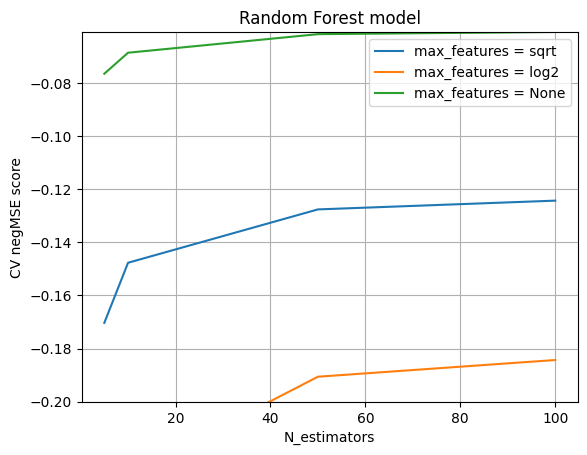

Best params = {'max_features': None, 'n_estimators': 100}
Best neg_MSE score = -0.06068529625918486



In [49]:
for max_features in random_forest_param_grid['max_features']:
    cv_results = random_forest_grid_cv.cv_results_
    indices = np.array([i for i, param in enumerate(cv_results['params']) if param['max_features'] == max_features])
    n_estimators = [param['n_estimators'] for param in cv_results['params'] if param['max_features'] == max_features]
    mean_test_score = cv_results['mean_test_score'][indices]
    
    plt.plot(n_estimators, mean_test_score, label=f"max_features = {max_features}")

random_forest_best_params = random_forest_grid_cv.best_params_

plt.ylim(-0.2, random_forest_grid_cv.best_score_) 
plt.title('Random Forest model')
plt.xlabel("N_estimators")
plt.ylabel("CV negMSE score")
plt.grid()
plt.legend()
plt.show()

print(f"Best params = {random_forest_best_params}")
print(f"Best neg_MSE score = {random_forest_grid_cv.best_score_}")
print()

In [50]:
ridge_grid_cv = GridSearchCV(
    estimator=ridge_model, 
    param_grid=ridge_param_grid, 
    scoring='neg_mean_squared_error', 
    cv=5, 
    n_jobs=-1
)

In [51]:
%%time
ridge_grid_cv.fit(X_train_transformed, y_train_transformed)

/Users/pyatykhina/anaconda3/envs/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pyatykhina/anaconda3/envs/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pyatykhina/anaconda3/envs/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pyatykhina/anaconda3/envs/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pyatykhina/anaconda3/envs/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

CPU times: user 1min 54s, sys: 6.46 s, total: 2min
Wall time: 1h 14min 40s


GridSearchCV(cv=5, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0, 0.001, 0.01, 0.1, 0.5, 1],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']},
             scoring='neg_mean_squared_error')

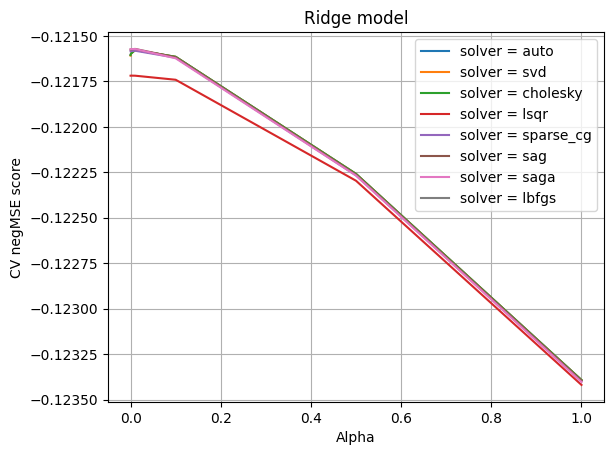

Best params = {'alpha': 0.01, 'solver': 'sag'}
Best neg_MSE score = -0.12157184757904735



In [52]:
for solver in ridge_param_grid['solver']:
    cv_results = ridge_grid_cv.cv_results_
    indices = np.array([i for i, param in enumerate(cv_results['params']) if param['solver'] == solver])
    alphas = [param['alpha'] for param in cv_results['params'] if param['solver'] == solver]
    mean_test_score = cv_results['mean_test_score'][indices]
    
    plt.plot(alphas, mean_test_score, label=f"solver = {solver}")

ridge_best_params = ridge_grid_cv.best_params_

plt.title('Ridge model')
plt.xlabel("Alpha")
plt.ylabel("CV negMSE score")
plt.grid()
plt.legend()
plt.show()

print(f"Best params = {ridge_best_params}")
print(f"Best neg_MSE score = {ridge_grid_cv.best_score_}")
print()

In [53]:
gradient_boosting_grid_cv = GridSearchCV(
    estimator=gradient_boosting_model, 
    param_grid=gradient_boosting_param_grid, 
    scoring='neg_mean_squared_error', 
    cv=5, 
    n_jobs=-1
)

In [54]:
%%time
gradient_boosting_grid_cv.fit(X_train_transformed, y_train_transformed)

python(64206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


CPU times: user 3min 22s, sys: 31.2 s, total: 3min 53s
Wall time: 19min 5s


GridSearchCV(cv=5, estimator=HistGradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5],
                         'max_iter': [10, 25, 50, 100, 200, 350, 500]},
             scoring='neg_mean_squared_error')

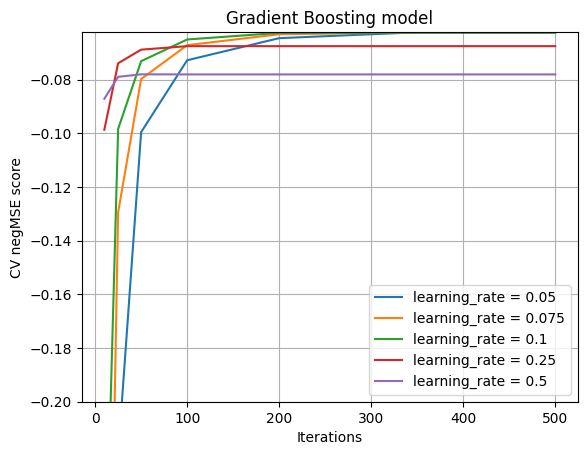

Best params = {'learning_rate': 0.05, 'max_iter': 500}
Best neg_MSE score = -0.06223977678030631



In [55]:
for learning_rate in gradient_boosting_param_grid['learning_rate']:
    cv_results = gradient_boosting_grid_cv.cv_results_
    indices = np.array([i for i, param in enumerate(cv_results['params']) if param['learning_rate'] == learning_rate])
    max_iters = [param['max_iter'] for param in cv_results['params'] if param['learning_rate'] == learning_rate]
    mean_test_score = cv_results['mean_test_score'][indices]
    
    plt.plot(max_iters, mean_test_score, label=f"learning_rate = {learning_rate}")

gradient_boosting_best_params = gradient_boosting_grid_cv.best_params_

plt.ylim(-0.2, gradient_boosting_grid_cv.best_score_)
plt.title('Gradient Boosting model')
plt.xlabel("Iterations")
plt.ylabel("CV negMSE score")
plt.grid()
plt.legend()
plt.show()

print(f"Best params = {gradient_boosting_best_params}")
print(f"Best neg_MSE score = {gradient_boosting_grid_cv.best_score_}")
print()

### Models' evaluation

In [56]:
def fit_predict_eval(model, X_train, y_train, X_test, y_test, metric):
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    train_metric = metric(y_train, y_train_pred)
    
    y_test_pred = model.predict(X_test)
    test_metric = metric(y_test, y_test_pred)
    
    return model, train_metric, test_metric

In [57]:
random_forest_best_model, random_forest_train_metric, random_forest_test_metric = fit_predict_eval(
    RandomForestRegressor(**random_forest_best_params, random_state=42),
    X_train_transformed, y_train_transformed, X_test_transformed, y_test_transformed, mean_squared_error
)
print('Random forest train MSE:', random_forest_train_metric)
print('Random forest test MSE:', random_forest_test_metric)

Random forest train MSE: 0.008407123380321797
Random forest test MSE: 0.9267098635105206


In [58]:
ridge_best_model, ridge_train_metric, ridge_test_metric = fit_predict_eval(
    Ridge(**ridge_best_params, random_state=42),
    X_train_transformed, y_train_transformed, X_test_transformed, y_test_transformed, mean_squared_error
)
print('Ridge train MSE:', ridge_train_metric)
print('Ridge test MSE:', ridge_test_metric)

Ridge train MSE: 0.11433304253094817
Ridge test MSE: 0.8676921985223018


In [59]:
gradient_boosting_best_model, gradient_boosting_train_metric, gradient_boosting_test_metric = fit_predict_eval(
    HistGradientBoostingRegressor(**gradient_boosting_best_params, random_state=42),
    X_train_transformed, y_train_transformed, X_test_transformed, y_test_transformed, mean_squared_error
)
print('Gradient boosting train MSE:', gradient_boosting_train_metric)
print('Gradient boosting test MSE:', gradient_boosting_test_metric)

Gradient boosting train MSE: 0.03871037020410132
Gradient boosting test MSE: 0.8393327812383076


We are interested in decreasing MSE on the test dataset.

Based on the experiments, the best result was shown by model based on gradient boosting. MSE on the test data is equal to 0.83933.

MSE is a dispersion between predicted values and real ones. 
Square root of MSE (0.91615) can be considered as standart deviation. 
STD has the same unit as the target value. So deviations of predicted values from real ones will not be more than 1 star.


Before film releasing we can predict the viewers' evaluation of this film. So during the production it is possible to know the estimated score and maybe change smth (actors, title, description, release date) and achieve the better results or refuse from producting this film.

So production company can receive the predicted raiting based on the data about their film, and define if this rating means success or no.

In [63]:
import joblib

joblib.dump(random_forest_grid_cv.best_estimator_, 'random_forest_model.pkl')

joblib.dump(ridge_grid_cv.best_estimator_, 'ridge_model.pkl')

joblib.dump(gradient_boosting_grid_cv.best_estimator_, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']